# 패키지 및 라이브러리

In [3]:
import os
import pandas as pd
import numpy as np
# import yahoo_fin.stock_info as si
import yfinance as yf
import xlwings as xw
import matplotlib.pyplot as plt
import openpyxl

In [14]:
# 해외유사기업, Healthcare 섹터 테스트용
healthcare_price_csv = r"https://raw.githubusercontent.com/DongwooChae/QuantifyPro/master/Python_portfolio/%ED%95%B4%EC%99%B8%EC%9C%A0%EC%82%AC%EA%B8%B0%EC%97%85_Healthcare_price_2.csv"
healthcare_data_csv = r"https://raw.githubusercontent.com/DongwooChae/QuantifyPro/master/Python_portfolio/%ED%95%B4%EC%99%B8%EC%9C%A0%EC%82%AC%EA%B8%B0%EC%97%85_Healthcare_data_2.csv"

healthcare_price = pd.read_csv(healthcare_price_csv)
healthcare_data = pd.read_csv(healthcare_data_csv)

In [16]:
# 데이터셋 인덱스 설정
healthcare_data.set_index(['Ticker', 'Name'], inplace=True)

In [20]:
# 주가 데이터 인덱스 설정
healthcare_price.set_index('Date', inplace=True)

# 인덱스를 날짜 형식으로 변환
healthcare_price.index = pd.to_datetime(healthcare_price.index)

In [51]:
# 1. Industry 열의 중복 제거
unique_industries = healthcare_data['Industry'].unique()

# 고유한 Industry 목록 출력
print("Unique Industries:")
for industry in unique_industries:
    print(industry)


Unique Industries:
Biotechnology
Drug Manufacturers - Specialty & Generic
Medical Care Facilities
Health Information Services
Diagnostics & Research
Medical Devices
Real Estate Services
Medical Instruments & Supplies
Healthcare Plans
Drug Manufacturers - General
nan
Packaged Foods
Specialty Chemicals
Medical Distribution
Household & Personal Products
Integrated Freight & Logistics
Specialty Retail
Tobacco
Leisure
Apparel Manufacturing
Scientific & Technical Instruments
Pharmaceutical Retailers
Food Distribution
Shell Companies
Consumer Electronics
Farm Products
Beverages - Wineries & Distilleries
Insurance - Specialty
Internet Content & Information
Building Products & Equipment
Aerospace & Defense
Specialty Industrial Machinery
Conglomerates
Security & Protection Services
Drug Manufacturers—Specialty & Generic
Specialty Business Services


In [22]:
healthcare_data

,,Country,Industry,Sector,Business Summary,Beta,Trailing PE,Forward PE,Price to Book,Market Cap,Shares Outstanding,...,Trailing EPS,Forward EPS,PEG Ratio,Enterprise to Revenue,Enterprise to EBITDA,Total Revenue,Debt to Equity,Revenue per Share,Return on Assets,Return on Equity
Ticker,Name,,,,,,,,,,,,,,,,,,,,,
AADI,"Aadi Bioscience, Inc.",United States,Biotechnology,Healthcare,"Aadi Bioscience, Inc., a biopharmaceutical com...",0.310,NaN,-1.143791,0.546704,4.307590e+07,24614800.0,...,-2.68,-1.53,NaN,-1.446,0.489,2.381700e+07,1.340,0.883,-0.34932,-0.62264
ABCL,AbCellera Biologics Inc.,Canada,Biotechnology,Healthcare,AbCellera Biologics Inc. builds an engine for ...,0.389,NaN,-3.635135,0.713528,7.926515e+08,294665984.0,...,-0.55,-0.74,-0.43,5.880,-0.905,3.305400e+07,6.486,0.113,-0.11412,-0.13297
ABEO,Abeona Therapeutics Inc.,United States,Biotechnology,Healthcare,"Abeona Therapeutics Inc., a clinical-stage bio...",1.580,NaN,-3.878378,3.265074,2.486246e+08,43314400.0,...,-1.84,-1.48,NaN,NaN,-2.723,NaN,31.628,NaN,-0.37814,-1.27380
ABIO,"ARCA biopharma, Inc.",United States,Biotechnology,Healthcare,"ARCA biopharma, Inc., a clinical stage biophar...",0.895,NaN,-0.432955,1.697105,6.034964e+07,14507100.0,...,-0.49,-8.80,NaN,NaN,-2.563,NaN,0.074,NaN,-0.14351,-0.20053
ABOS,"Acumen Pharmaceuticals, Inc.",United States,Biotechnology,Healthcare,"Acumen Pharmaceuticals, Inc., a clinical-stage...",0.111,NaN,-1.921569,0.724138,1.766346e+08,60079800.0,...,-1.11,-1.53,-1.33,NaN,0.706,NaN,12.185,NaN,-0.20555,-0.31425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VGR,Vector Group Ltd.,United States,Tobacco,Consumer Defensive,"Vector Group Ltd., through its subsidiaries, e...",0.988,12.039682,10.835714,NaN,2.387394e+09,157376000.0,...,1.26,1.40,0.61,3.402,8.910,9.529720e+08,NaN,6.211,0.20981,NaN
WRBY,Warby Parker Inc.,United States,Medical Instruments & Supplies,Healthcare,Warby Parker Inc. provides eyewear products in...,1.829,NaN,52.266666,5.703892,1.858676e+09,100657000.0,...,-0.39,0.30,NaN,2.547,-173.218,7.199290e+08,58.364,6.052,-0.05553,-0.14538
WST,"West Pharmaceutical Services, I",United States,Medical Instruments & Supplies,Healthcare,"West Pharmaceutical Services, Inc. designs, ma...",0.995,43.109375,38.908974,8.550700,2.201565e+10,72541600.0,...,7.04,7.80,42.74,7.607,28.916,2.876900e+09,12.186,39.009,0.10663,0.19720


In [21]:
healthcare_price

,AADI,ABBV,ABCL,ABEO,ABIO,ABOS,ABSI,ABT,ABUS,ABVC,...,ZLAB,ZNTL,ZOM,ZTS,ZURA,ZURAW,ZVRA,ZVSA,ZYME,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-26,1.75,197.440002,2.69,5.74,3.81,2.94,4.49,112.699997,3.87,0.710,...,19.030001,3.180000,0.131,181.559998,4.03,NaN,7.07,2.800000,11.54,8.35
2024-08-23,1.58,197.550003,2.61,5.52,4.16,2.91,4.49,112.690002,3.89,0.715,...,18.020000,3.190000,0.137,180.899994,3.57,NaN,7.18,2.960000,11.39,8.19
2024-08-22,1.55,196.369995,2.51,5.12,3.92,2.81,4.23,112.099998,3.81,0.710,...,17.549999,3.080000,0.135,182.169998,3.55,NaN,7.26,3.020000,11.16,7.75
2024-08-21,1.55,196.529999,2.64,5.24,3.87,2.85,4.35,111.389999,3.87,0.731,...,17.500000,3.300000,0.136,182.899994,3.54,NaN,7.53,3.740000,11.10,7.73
2024-08-20,1.62,196.149994,2.60,5.13,3.67,2.83,4.23,110.769997,3.83,0.738,...,17.090000,3.140000,0.138,183.600006,3.55,NaN,7.59,3.200000,10.87,7.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,5.86,148.199997,5.59,4.19,2.06,6.11,1.87,102.849998,2.05,1.240,...,26.100000,27.139999,0.189,192.520004,6.98,NaN,5.38,49.349998,7.49,7.55
2023-08-31,6.30,146.960007,5.45,4.43,2.05,6.02,1.79,102.900002,2.03,1.310,...,25.469999,26.559999,0.185,190.509995,6.88,NaN,5.07,49.700001,7.24,7.70
2023-08-30,6.68,148.320007,5.80,4.34,2.06,6.36,1.84,104.410004,2.02,1.250,...,26.510000,26.580000,0.185,192.699997,6.91,NaN,5.30,49.700001,7.35,7.75


In [25]:
# SPS 데이터 가져오기 (인덱스를 Ticker로 설정)
revenue_per_share = healthcare_data.reset_index().set_index('Ticker')['Revenue per Share']

# 새로운 데이터프레임을 healthcare_price와 동일한 형식으로 생성
healthcare_multiple = healthcare_price.copy()

# PSR을 계산할 때, Revenue per Share 값이 존재하고 주가 데이터가 존재하는 경우에만 계산
for ticker in healthcare_price.columns:
    # revenue_per_share의 인덱스를 Ticker로 처리
    if ticker in revenue_per_share.index and pd.notna(revenue_per_share[ticker]):
        healthcare_multiple[ticker] = healthcare_price[ticker] / revenue_per_share[ticker]
    else:
        # Revenue per Share 또는 주가 데이터가 없는 경우, NaN으로 유지
        healthcare_multiple[ticker] = float('nan')

# 결과 확인
healthcare_multiple.head()


,AADI,ABBV,ABCL,ABEO,ABIO,ABOS,ABSI,ABT,ABUS,ABVC,...,ZLAB,ZNTL,ZOM,ZTS,ZURA,ZURAW,ZVRA,ZVSA,ZYME,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-26,1.981880,6.348553,23.805310,NaN,NaN,NaN,136.060599,4.815828,66.724136,41.764705,...,5.731928,5.559441,4.851852,9.330866,NaN,NaN,11.724710,NaN,13.528722,1.436189
2024-08-23,1.789355,6.352090,23.097344,NaN,NaN,NaN,136.060599,4.815400,67.068967,42.058822,...,5.427711,5.576923,5.074074,9.296947,NaN,NaN,11.907131,NaN,13.352873,1.408669
2024-08-22,1.755379,6.314148,22.212389,NaN,NaN,NaN,128.181819,4.790189,65.689654,41.764705,...,5.286144,5.384615,5.000000,9.362216,NaN,NaN,12.039801,NaN,13.083235,1.332989
2024-08-21,1.755379,6.319293,23.362833,NaN,NaN,NaN,131.818179,4.759850,66.724136,43.000000,...,5.271084,5.769231,5.037037,9.399732,NaN,NaN,12.487563,NaN,13.012896,1.329549
2024-08-20,1.834655,6.307074,23.008849,NaN,NaN,NaN,128.181819,4.733356,66.034481,43.411763,...,5.147590,5.489511,5.111111,9.435708,NaN,NaN,12.587065,NaN,12.743259,1.315789


In [26]:
healthcare_multiple

,AADI,ABBV,ABCL,ABEO,ABIO,ABOS,ABSI,ABT,ABUS,ABVC,...,ZLAB,ZNTL,ZOM,ZTS,ZURA,ZURAW,ZVRA,ZVSA,ZYME,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-26,1.981880,6.348553,23.805310,NaN,NaN,NaN,136.060599,4.815828,66.724136,41.764705,...,5.731928,5.559441,4.851852,9.330866,NaN,NaN,11.724710,NaN,13.528722,1.436189
2024-08-23,1.789355,6.352090,23.097344,NaN,NaN,NaN,136.060599,4.815400,67.068967,42.058822,...,5.427711,5.576923,5.074074,9.296947,NaN,NaN,11.907131,NaN,13.352873,1.408669
2024-08-22,1.755379,6.314148,22.212389,NaN,NaN,NaN,128.181819,4.790189,65.689654,41.764705,...,5.286144,5.384615,5.000000,9.362216,NaN,NaN,12.039801,NaN,13.083235,1.332989
2024-08-21,1.755379,6.319293,23.362833,NaN,NaN,NaN,131.818179,4.759850,66.724136,43.000000,...,5.271084,5.769231,5.037037,9.399732,NaN,NaN,12.487563,NaN,13.012896,1.329549
2024-08-20,1.834655,6.307074,23.008849,NaN,NaN,NaN,128.181819,4.733356,66.034481,43.411763,...,5.147590,5.489511,5.111111,9.435708,NaN,NaN,12.587065,NaN,12.743259,1.315789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,6.636467,4.765273,49.469028,NaN,NaN,NaN,56.666667,4.394923,35.344827,72.941177,...,7.861446,47.447551,7.000000,9.894131,NaN,NaN,8.922057,NaN,8.780773,1.298590
2023-08-31,7.134768,4.725402,48.230087,NaN,NaN,NaN,54.242423,4.397060,35.000000,77.058820,...,7.671687,46.433566,6.851852,9.790831,NaN,NaN,8.407960,NaN,8.487690,1.324389
2023-08-30,7.565119,4.769132,51.327435,NaN,NaN,NaN,55.757577,4.461585,34.827586,73.529412,...,7.984940,46.468531,6.851852,9.903381,NaN,NaN,8.789387,NaN,8.616647,1.332989


In [ ]:
# healthcare_multiple.to_csv('healthcare_multiple.csv') csv파일로 저장

# AADI 기업의 데이터 시각화
# 최근 6개월 데이터 필터링
# assuming the dates are sorted, we will take the last 6 months of data
last_six_months = healthcare_multiple.index[-6*30:]  # 약 6개월, 30일을 곱하여 필터링
aadi_psr_last_6_months = healthcare_multiple.loc[last_six_months, 'AADI']

# 시각화
plt.figure(figsize=(20, 12))
plt.plot(aadi_psr_last_6_months.index, aadi_psr_last_6_months, marker='o', linestyle='-', color='black')
plt.title('AADI PSR Over the Last 6 Months')
plt.xlabel('Date')
plt.ylabel('PSR')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# 오름차순으로 정렬하여 필터링한 후 다시 내림차순으로 정렬
filtered_data = healthcare_multiple.sort_index().loc['2024-01-01':'2024-06-30'].sort_index(ascending=False)

# PSR이 계산된 기업 중 처음 50개를 선택
selected_tickers = filtered_data.columns[:50]

# 시각화
plt.figure(figsize=(20, 12))

for ticker in selected_tickers:
    plt.plot(filtered_data.index, filtered_data[ticker], marker='o', linestyle='-', label=ticker)

plt.title('PSR Changes for 50 Companies (2024-01-01 to 2024-06-30)')
plt.xlabel('Date')
plt.ylabel('PSR')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, fontsize='small')
plt.tight_layout()
plt.show()


In [ ]:
# 1. 기간 필터링: 2023-10-31 ~ 2024-04-30
filtered_data = healthcare_multiple.sort_index().loc['2023-10-31':'2024-04-30'].sort_index(ascending=False)

# 2. 필터링된 기간 동안의 평균값을 계산 (기업별)
average_psr = filtered_data.mean()

# 3. 비정상적인 PSR 값 필터링: 음수 또는 너무 큰 값 제거 (예: 0 < PSR < 100)
filtered_average_psr = average_psr[(average_psr > 0) & (average_psr < 100)]

# 4. 통계값 계산: 평균, 중위값, 최소값, 최대값, 상위 25%, 상위 75%
statistics = {
    'Mean': filtered_average_psr.mean(),
    'Median': filtered_average_psr.median(),
    'Min': filtered_average_psr.min(),
    'Max': filtered_average_psr.max(),
    '25th Percentile': filtered_average_psr.quantile(0.25),
    '75th Percentile': filtered_average_psr.quantile(0.75)
}

# 통계값 데이터프레임으로 변환
statistics_df = pd.DataFrame(statistics, index=['PSR Statistics'])

# 결과 출력
statistics_df, filtered_average_psr.sort_values()


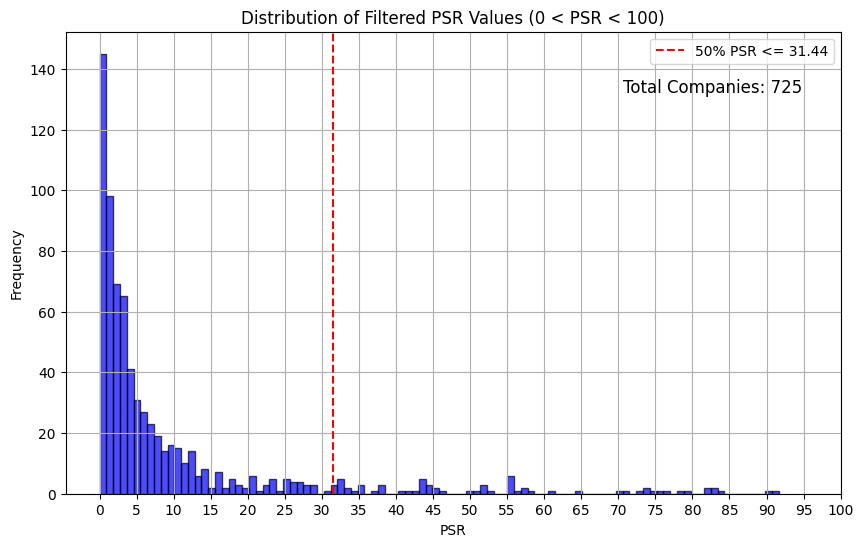

In [48]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(filtered_average_psr, bins=100, color='blue', edgecolor='black', alpha=0.7)

# x축 라벨을 5단위로 표시
plt.xticks(range(0, 101, 5))

# 총 기업 수 표시
total_companies = len(filtered_average_psr)
plt.text(0.95, 0.9, f'Total Companies: {total_companies}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', horizontalalignment='right')

# 상위 50% 포함된 구간 계산
sorted_psr = np.sort(filtered_average_psr)
cumulative = np.cumsum(sorted_psr)
cumulative_percentage = cumulative / cumulative[-1]

# 상위 50% 구간 찾기
threshold_index = np.argmax(cumulative_percentage >= 0.5)
threshold_value = sorted_psr[threshold_index]

# 상위 50% 구간 표시
plt.axvline(x=threshold_value, color='red', linestyle='--', label=f'50% PSR <= {threshold_value:.2f}')
plt.legend()

plt.title('Distribution of Filtered PSR Values (0 < PSR < 100)')
plt.xlabel('PSR')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 구글번역기 연동, 해외유사기업 Business Summary 번역 요약 제공(추후 구현예정)

In [ ]:
# from googletrans import Translator
# from sumy.parsers.plaintext import PlaintextParser
# from sumy.nlp.tokenizers import Tokenizer
# from sumy.summarizers.lsa import LsaSummarizer
# from pandas_datareader import data as pdr

# 경로 지정

In [49]:
# 엑셀 파일 경로
file_path = r"C:\Users\User\Documents\GitHub\QuantifyPro\Python_portfolio\해외유사기업 취합_24.3Q_coding.xlsx"
# Github 자료 관리할 때 경로 매번 지정해줘야 함


# 엑셀 파일 열기
wb = xw.Book(file_path)
sheet = wb.sheets['TICKER']



df1=pd.read_excel(file_path, sheet_name='TICKER')
df2=pd.read_excel(file_path, sheet_name='price')

In [11]:
# df2[df2['Date']>='2023-10-31' ]

### 미국 및 일본에 상장된 기업의 TICKER만 추출하기

In [15]:
# Step 1: US에 해당하는 티커 필터링 및 중복 제거
tickers_with_country = sheet.range("A2:A" + str(sheet.range("A2").end('down').row)).value

filtered_tickers = []
for item in tickers_with_country:
    if item:
        split_item = item.split(" ")
        ticker = split_item[0]
        country = split_item[1]
        if country in ['US'] and ticker not in filtered_tickers:
            filtered_tickers.append(ticker)

# 필터링된 티커를 C열에 출력
sheet.range("B2:B" + str(len(filtered_tickers) + 1)).value = [[ticker] for ticker in filtered_tickers]

### 추출된 TICKER를 Yahoo Finance에서 조회하여 데이터 가져오기

In [16]:
# Step 2: yfinance를 사용해 각 티커에 대한 정보 가져오기
data = []
for ticker in filtered_tickers:
    try:
        ticker_data = yf.Ticker(ticker)
        info = ticker_data.info

        # Check if info is None or empty
        if not info:
            print(f"No data found for ticker {ticker}")
            data.append([ticker] + ['N/A'] * 21)  # 추가된 country를 고려해 21로 수정
            continue

        # 필요한 정보 추출
        country = info.get('country', 'N/A')
        industry = info.get('industry', 'N/A')
        sector = info.get('sector', 'N/A')
        business = info.get('longBusinessSummary', 'N/A')
        beta = info.get('beta', 'N/A')
        trailingPE = info.get('trailingPE', 'N/A')
        forwardPE = info.get('forwardPE', 'N/A')
        priceToBook = info.get('priceToBook', 'N/A')
        marketCap = info.get('marketCap', 'N/A')
        sharesOutstanding = info.get('sharesOutstanding', 'N/A')
        bookValue = info.get('bookValue', 'N/A')
        trailingEps = info.get('trailingEps', 'N/A')
        forwardEps = info.get('forwardEps', 'N/A')
        pegRatio = info.get('pegRatio', 'N/A')
        enterpriseToRevenue = info.get('enterpriseToRevenue', 'N/A')
        enterpriseToEbitda = info.get('enterpriseToEbitda', 'N/A')
        totalRevenue = info.get('totalRevenue', 'N/A')
        debtToEquity = info.get('debtToEquity', 'N/A')
        revenuePerShare = info.get('revenuePerShare', 'N/A')
        returnOnAssets = info.get('returnOnAssets', 'N/A')
        returnOnEquity = info.get('returnOnEquity', 'N/A')

        # 데이터 리스트에 추가 (추출한 정보 순서에 맞게 리스트 작성)
        data.append([ticker, country, industry, sector, business, beta, trailingPE, forwardPE, priceToBook, 
                     marketCap, sharesOutstanding, bookValue, trailingEps, forwardEps, pegRatio, 
                     enterpriseToRevenue, enterpriseToEbitda, totalRevenue, debtToEquity, revenuePerShare, 
                     returnOnAssets, returnOnEquity])

    except Exception as e:
        print(f"Error retrieving data for ticker {ticker}: {e}")
        data.append([ticker] + ['N/A'] * 21)  # 오류 시 21개의 'N/A'로 추가

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AYX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AYX&crumb=k0z95nSvhSp
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CRD/A?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CRD%2FA&crumb=k0z95nSvhSp


Error retrieving data for ticker CRD/A: Failed to parse json response from Yahoo Finance: {'code': 'Not Found', 'description': 'HTTP 404 Not Found'}


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/0609567D?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=0609567D&crumb=k0z95nSvhSp


In [17]:
# Step 3: 데이터프레임으로 변환
columns = ['Ticker', 'Country', 'Industry', 'Sector', 'Business', 'beta', 'trailingPE', 'forwardPE', 'priceToBook', 
           'marketCap', 'sharesOutstanding', 'bookValue', 'trailingEps', 'forwardEps', 'pegRatio',
           'enterpriseToRevenue', 'enterpriseToEbitda', 'totalRevenue', 'debtToEquity', 'revenuePerShare',
           'returnOnAssets', 'returnOnEquity']

df = pd.DataFrame(data, columns=columns)
df.set_index('Ticker', inplace=True)
df = df.sort_values(by='Sector')


### Step_one_index 시트에 데이터 붙여넣기

In [18]:
# Step 4: 'Ticker_Info_Test' 시트가 있는지 확인하고, 있으면 그 시트를 사용하고 없으면 새로 추가
if 'Step_one_index' in [sheet.name for sheet in wb.sheets]:
    output_sheet = wb.sheets['Step_one_index']
else:
    output_sheet = wb.sheets.add('Step_one_index')
    # 시트가 없을 경우에만 새로 추가

# output_sheet.clear() >> clear 함수를 이용하면 완전히 clear됨. 즉, 기존 서식마저도 모두 삭제
# 데이터프레임을 엑셀 시트에 저장
output_sheet.range("A1").value = df

In [20]:
# Microsoft 데이터 추출 테스트
# msft = yf.Ticker("MSFT")
# msft_price = msft.history(period="1y")
# msft_price["Close"]

# 차트 제작(분산형)

### 추후 구현 예정

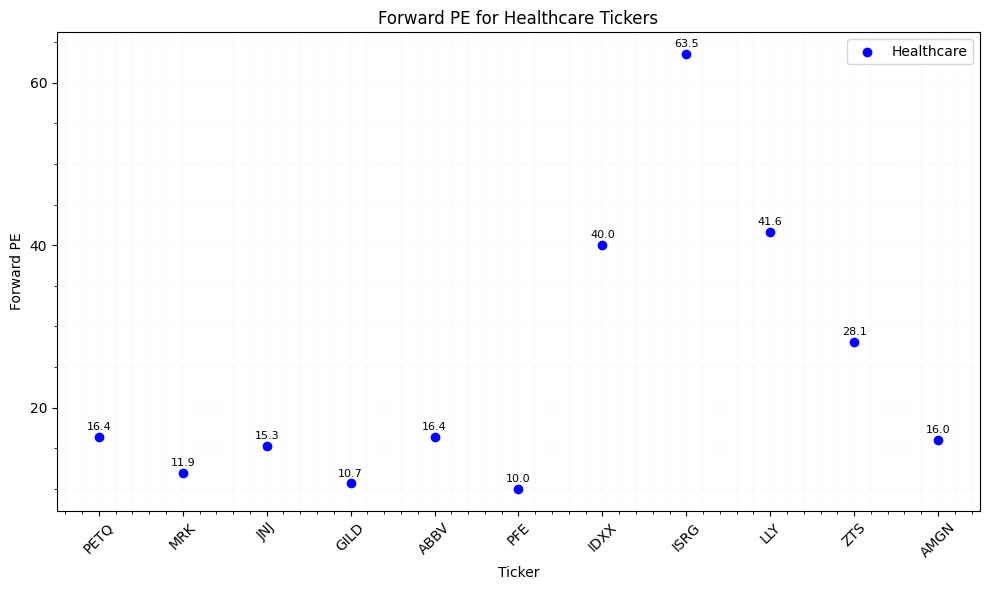

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: 'Healthcare' 섹터에 해당하는 데이터만 필터링
healthcare_df = df[df['Sector'] == 'Healthcare']

# Forward PE 값이 0 이상인 데이터만 필터링
healthcare_df = healthcare_df[healthcare_df['forwardPE'] >= 0]


# Step 2: 산점도 그리기
plt.figure(figsize=(10, 6))

# x축은 티커명 (인덱스), y축은 forwardPE 값
plt.scatter(healthcare_df.index, healthcare_df['forwardPE'], color='blue', label='Healthcare')

# 차트 제목, 축 레이블 추가
plt.title('Forward PE for Healthcare Tickers')
plt.xlabel('Ticker')
plt.ylabel('Forward PE')

# x축 레이블이 티커명이라 길 수 있어 각도를 45도로 조정
plt.xticks(rotation=45)

# 1. Grid 추가
plt.grid(True, which='both', linestyle='--', linewidth=0.05)

# 2. Minor 틱 추가
plt.minorticks_on()

# y축의 틱 간격을 5로 줄임
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(5))

# 3. 각 점 위에 forwardPE 값을 표시
for i, txt in enumerate(healthcare_df['forwardPE']):
    plt.annotate(f"{txt:.1f}", (healthcare_df.index[i], healthcare_df['forwardPE'].iloc[i]), 
                 textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

# 범례 추가
plt.legend()

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()


# 6개월 주가 선별 대상

In [34]:
# Step 1: 엑셀 파일 열기 및 TICKER 시트에서 G2:G30의 티커명 읽기
file_path = r'C:\Users\User\Documents\GitHub\QuantifyPro\Python_portfolio\해외유사기업 취합_24.3Q_coding.xlsx'
wb = xw.Book(file_path)
sheet = wb.sheets['TICKER']

# G2부터 G30까지의 티커명 읽기
tickers = sheet.range('F2:F30').value

# None 또는 빈 문자열을 제거하여 유효한 티커만 남기기
tickers = [ticker for ticker in tickers if ticker is not None and ticker.strip() != ""]

# Step 2: 여러 티커에 대한 주가 데이터 가져오기 (1년간의 주가)
data = {}
for ticker in tickers:
    try:
        # 각 티커의 주가 데이터 가져오기 (1년치)
        ticker_data = yf.Ticker(ticker)
        price_data = ticker_data.history(period="1y")['Close']
        
        # 데이터를 딕셔너리에 저장 (티커명을 키로 사용)
        data[ticker] = price_data
        
    except Exception as e:
        print(f"Error retrieving data for ticker {ticker}: {e}")

# Step 3: 데이터프레임으로 변환
selected_ticker_price = pd.DataFrame(data)
selected_ticker_price = selected_ticker_price.sort_index(ascending=False)

In [35]:
# Step 5: 엑셀의 'price' 시트에 붙여넣기
if 'price' in [sheet.name for sheet in wb.sheets]:
    price_sheet = wb.sheets['price']
else:
    price_sheet = wb.sheets.add('price')

# 기존 데이터 지우기 (덮어쓰기)
# price_sheet.clear()

# 데이터프레임을 엑셀 시트에 붙여넣기
price_sheet.range("A1").value = selected_ticker_price


# ▲▲▲▲▲ 여기까지 작업 완료 ▲▲▲▲▲

In [ ]:
wm = yf.Ticker("WM")
wm.earnings_dates

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2025-07-22 06:00:00-04:00,NaN,NaN,NaN
2025-04-22 06:00:00-04:00,NaN,NaN,NaN
2025-02-10 16:00:00-05:00,NaN,NaN,NaN
2024-10-22 06:00:00-04:00,1.89,NaN,NaN
2024-07-24 16:00:00-04:00,1.83,1.82,-0.0033
2024-04-24 17:00:00-04:00,1.51,1.75,0.1626
2024-02-12 18:00:00-05:00,1.53,1.74,0.1361
2023-10-24 17:00:00-04:00,1.61,1.63,0.0093
2023-07-25 17:00:00-04:00,1.54,1.51,-0.0203


#### pfizer 데이터 추출 예시

In [51]:
pfizer = yf.Ticker("PFE")
pfizer.info_df = pd.DataFrame(list(pfizer.info.items()), columns=['Key', 'Value'])
pfizer.info_df.head(15)


,Key,Value
0,address1,66 Hudson Boulevard East
1,city,New York
2,state,NY
3,zip,10001-2192
4,country,United States
5,phone,212 733 2323
6,website,https://www.pfizer.com
7,industry,Drug Manufacturers - General
8,industryKey,drug-manufacturers-general
9,industryDisp,Drug Manufacturers - General


In [43]:
pfizer = yf.Ticker("PFE")
pfizer.info_df = pd.DataFrame(list(pfizer.info.items()), columns=['Key', 'Value'])
pfizer.info_df.head(15)

# .info 메서드를 통해 딕셔너리 형태의 데이터를 가져옴
msft_info = msft.info

# 딕셔너리를 데이터프레임으로 변환
msft_info_df = pd.DataFrame(list(msft_info.items()), columns=['Key', 'Value'])

# pandas 출력 옵션 설정: 최대 행 수를 None으로 설정하여 모두 출력
pd.set_option('display.max_rows', None)


AttributeError: 'Ticker' object has no attribute 'head'

### .info 데이터 키 값 확인

In [64]:
import yfinance as yf
import pandas as pd

# Ticker 정보 가져오기
wm = yf.Ticker("WM")
# wm_info_df = pd.DataFrame(wm.info)


# 엑셀 시트 선택
key_sheet = wb.sheets['PARAMETER']

# DataFrame의 값을 리스트로 변환하여 엑셀에 쓰기 (헤더 포함)
# key_sheet.range("A13").value = wm_info_df



TypeError: 'dict' object is not callable

In [48]:
key_sheet = wb.sheets('PARAMETER')

In [38]:
# Step 1: MSFT 티커 정보 가져오기
msft = yf.Ticker("MSFT")

# Step 2: 1년간의 주가 데이터 가져오기
msft_price = msft.history(period="1y")

# Step 3: 최근 재무제표에서 Basic EPS 값 가져오기
# yfinance의 income statement에서 Basic EPS 가져오기
income_stmt = msft.income_stmt  # income statement 정보 가져오기
latest_eps = income_stmt.loc['Basic EPS'].iloc[0]  # 최근 재무 기준일의 Basic EPS

# Step 4: 매일의 PER 계산 (종가 / Basic EPS)
msft_price['PER'] = msft_price['Close'] / latest_eps

In [ ]:
msft_price[['Close','PER']]

,Close,PER
Date,,
2023-08-21 00:00:00-04:00,319.481964,26.937771
2023-08-22 00:00:00-04:00,320.057617,26.986308
2023-08-23 00:00:00-04:00,324.563812,27.366257
2023-08-24 00:00:00-04:00,317.586182,26.777924
2023-08-25 00:00:00-04:00,320.573761,27.029828
...,...,...
2024-08-14 00:00:00-04:00,416.109985,35.085159
2024-08-15 00:00:00-04:00,421.029999,35.500000
2024-08-16 00:00:00-04:00,418.470001,35.284149


In [ ]:
# Step 6: 그래프로 PER 시각화
plt.figure(figsize=(20, 10))
plt.plot(msft_price.index, msft_price['PER'], label='PER', color='black', linestyle='-', marker='o')
plt.title('MSFT PER (Price-to-Earnings Ratio) Over Time')
plt.xlabel('Date')
plt.ylabel('PER')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
pe_ratio_ttm = info.get('trailingPE', 'N/A')
data = {}
df = pd.DataFrame(data)

In [ ]:
# Step 5: 엑셀의 'price' 시트에 붙여넣기
if 'price' in [sheet.name for sheet in wb.sheets]:
    price_sheet = wb.sheets['price']
else:
    price_sheet = wb.sheets.add('price')

# 기존 데이터 지우기 (덮어쓰기)
# price_sheet.clear()

# 데이터프레임을 엑셀 시트에 붙여넣기
price_sheet.range("A1").value = selected_ticker_price



In [ ]:
# Step 1: MSFT 티커 정보 가져오기
msft = yf.Ticker("MSFT")
msft_info_df = pd.DataFrame(list(msft.info.items()), columns =['Key', 'Value'])




# .info 메서드를 통해 딕셔너리 형태의 데이터를 가져옴
# msft_info = msft.info

# 딕셔너리를 데이터프레임으로 변환
# msft_info_df = pd.DataFrame(list(msft_info.items()), columns=['Key', 'Value'])


key_sheet = wb.sheets['PARAMETER']
key_sheet.range("A13").value = msft_info_df

In [ ]:
# Step 4: Sector 및 priceToBook 값이 'N/A'가 아닌 행만 필터링
df = df[df['Sector'] != 'N/A']
df['priceToBook'] = pd.to_numeric(df['priceToBook'], errors='coerce')  # priceToBook을 숫자로 변환

# Step 5: Sector별로 그룹화하고, 각 Sector에서 priceToBook 값의 평균 계산
sector_price_to_book = df.groupby('Sector')['priceToBook'].mean()

# Step 6: 그래프 시각화 (matplotlib 사용)
plt.figure(figsize=(10, 6))
sector_price_to_book.plot(kind='bar', color='skyblue')
plt.title('Average Price-to-Book Ratio by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Price-to-Book Ratio')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')

In [ ]:
# Step 6: 그래프 시각화 (matplotlib 사용)
plt.figure(figsize=(10, 6))
sector_price_to_book.plot(kind='bar', color='skyblue')
plt.title('Average Price-to-Book Ratio by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Price-to-Book Ratio')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')

# 그래프를 이미지 파일로 저장 (절대 경로 사용)
image_path = r'C:\Users\dwchae23\Desktop\Python_portfolio\img_source\price_to_book_graph.png'
plt.tight_layout()

# savefig를 show 전에 호출해서 그래프가 제대로 저장되도록 함
plt.savefig(image_path)

# 그래프가 화면에 출력되지 않도록 plt.close()로 닫음
plt.close()

# Step 7: 이미지 파일 존재 여부 확인
if not os.path.exists(image_path):
    raise FileNotFoundError(f"The image file was not found at {image_path}")

# Step 8: 엑셀 파일 열기 및 GRAPH 시트에 이미지 삽입
file_path = r'\\10.10.10.11\Ai본부\F.AI본부\★평가리뷰\대체평가3팀(리뷰)\해외유사기업\해외유사기업 취합_24.3Q_coding.xlsx'  # 엑셀 파일 경로 설정
wb = xw.Book(file_path)

# Step 9: 'GRAPH' 시트가 있는지 확인하고, 있으면 그 시트를 사용하고 없으면 새로 추가
if 'GRAPH' in [sheet.name for sheet in wb.sheets]:
    graph_sheet = wb.sheets['GRAPH']
else:
    graph_sheet = wb.sheets.add('GRAPH')

# 기존 내용 지우기 (덮어쓰기)
graph_sheet.clear()

# Step 10: 그래프 이미지 엑셀 시트에 삽입
graph_sheet.pictures.add(image_path, name='PriceToBookGraph', update=True, left=50, top=50)


<Picture 'PriceToBookGraph' in <Sheet [해외유사기업 취합_24.3Q_coding.xlsx]GRAPH>>